In [93]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [94]:
def gen_data(m, seed=1, scale=0.7):
    """ generate a data set based on a x^2 with added noise """
    c = 0
    x_train = np.linspace(0,49,m)
    np.random.seed(seed)
    y_ideal = x_train**2 + c
    y_train = y_ideal + scale * y_ideal*(np.random.sample((m,))-0.5)
    x_ideal = x_train #for redraw when new data included in X
    return x_train, y_train, x_ideal, y_ideal

def gen_blobs():
    classes = 6
    m = 800
    std = 0.4
    centers = np.array([[-1, 0], [1, 0], [0, 1], [0, -1],  [-2,1],[-2,-1]])
    X, y = make_blobs(n_samples=m, centers=centers, cluster_std=std, random_state=2, n_features=2)
    return (X, y, centers, classes, std)


X.shape (18,) y.shape (18,)


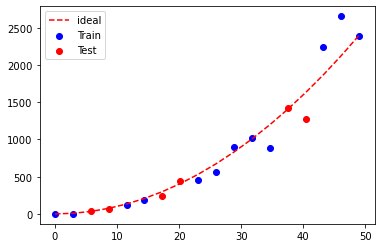

In [95]:
# Generate some data
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

# Split the data using sklearn
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=1)

fig, ax = plt.subplots(1)
plt.scatter(xTrain, yTrain, label = "Train", color = "blue")
plt.scatter(xTest, yTest, label = "Test", color = "red")

plt.plot(x_ideal, y_ideal, "--", c = "red", label = "ideal")

ax.legend()

plt.show()

In [96]:
def evalMse(y, yhat):
    m = len(y)
    err = 0.0

    for i in range(m):
        err += (y[i]-yhat[i])**2
    
    return err/2/m
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])

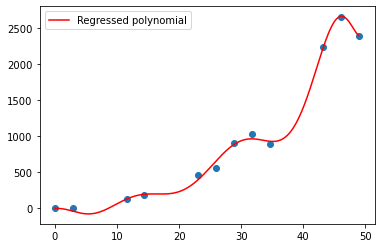

training err 845.52, test err 1025329.15


In [97]:
# The train data are not sorted we sort them first
poly = PolynomialFeatures(degree=10, include_bias=False)

data = poly.fit_transform(xTrain.reshape((-1,1)))
polyReg = LinearRegression(fit_intercept=False)
polyReg.fit(data, yTrain)

xPred = np.arange(xTrain.min(), xTrain.max(), .1)
yPred = polyReg.predict(data)

# Plotting the regressed polynomial
temp = np.array(sorted(zip(xTrain,yTrain), key = lambda x:x[0]))
xTrain_ = temp[:,0]
yTrain_ = temp[:,1]
coeff = [co for co in polyReg.coef_]
coeff.insert(0, polyReg.intercept_)
coeff = list(reversed(coeff))
xx = np.polyval(coeff, xPred)

plt.scatter(xTrain_, yTrain_)
plt.plot(xPred, xx, c = "r", label = "Regressed polynomial")
plt.legend()
plt.show()

print(f"training err {evalMse(yTrain, yPred):0.2f}, test err {evalMse(yTest,yPred):0.2f}")

In [98]:
# Generate  data
X,y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

# Split the data using SKLEARN
xTrain, X_, yTrain, Y_ = train_test_split(X, y, test_size=.4, random_state=1)
xCV, xTest, yCV, yTest = train_test_split(X_, Y_, test_size=.5, random_state=1)
print("X_train.shape", xTrain.shape, "y_train.shape", yTrain.shape)
print("X_cv.shape", xCV.shape, "y_cv.shape", yCV.shape)
print("X_test.shape", xTest.shape, "y_test.shape", yTest.shape)

X.shape (40,) y.shape (40,)
X_train.shape (24,) y_train.shape (24,)
X_cv.shape (8,) y_cv.shape (8,)
X_test.shape (8,) y_test.shape (8,)


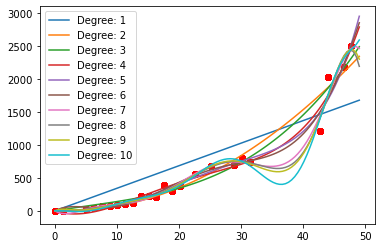

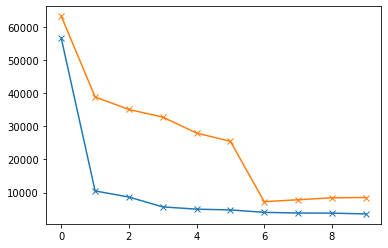

In [99]:
maxDegree = 10
errTrain = np.zeros(maxDegree)
errCV    = np.zeros(maxDegree)

# For plotting
x_ = np.linspace(X.min(), X.max(), 100)
ypredArray = np.zeros((100, maxDegree))

for i in range(maxDegree):
    poly = PolynomialFeatures(degree = i+1, include_bias=False)
    data = poly.fit_transform(xTrain.reshape((-1,1)))
    polyReg = LinearRegression(fit_intercept=False)
    polyReg.fit(data, yTrain)
    yPred = polyReg.predict(data)
    errTrain[i] = evalMse(yTrain, yPred)

    temp = np.array(sorted(zip(xTrain,yTrain), key = lambda x:x[0]))
    xTrain_ = temp[:,0]
    yTrain_ = temp[:,1]
    coeff = [co for co in polyReg.coef_]
    coeff.insert(0, polyReg.intercept_)
    coeff = list(reversed(coeff))
    xx = np.polyval(coeff, x_)

    poly = PolynomialFeatures(degree = i+1, include_bias=False)
    data = poly.fit_transform(xCV.reshape((-1,1)))
    polyReg = LinearRegression(fit_intercept=False)
    polyReg.fit(data, yCV)
    yPred = polyReg.predict(data)
    errCV[i] = evalMse(yCV,yPred)

    plt.scatter(xTrain_, yTrain_, c = "r")
    plt.plot(x_, xx, label = f"Degree: {i+1}")
plt.legend()
plt.show()

plt.plot(errTrain, marker = "x")
plt.plot(errCV, marker = "x")
    

In [100]:
# Generate and split data set
X, y, centers, classes, std = gen_blobs()

xTrain, x_, yTrain, y_ = train_test_split(X, y, test_size=.5, random_state=1)
xCV, xTest, yCV, yTest = train_test_split(X, y, test_size=.2, random_state=1)
print("xTrain.shape:", xTrain.shape, "xCV.shape:", xCV.shape, "xTest.shape:", xTest.shape)

def evalCatErr(y, yhat):
    m = len(y)
    incorrect = 0

    for i in range(m):
        if y[i]!= yhat[i]:
            incorrect += 1
    return incorrect/m

y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(evalCatErr(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(evalCatErr(y_hat, y_tmp)):0.3f}, expected:0.250" )

xTrain.shape: (400, 2) xCV.shape: (640, 2) xTest.shape: (160, 2)
categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250


In [101]:
tf.random.set_seed(1234)
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units=120, activation="relu"),
        tf.keras.layers.Dense(units=40, activation="relu"),
        tf.keras.layers.Dense(units=6, activation="linear"),
    ], name = "complexModel"
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(.01)
)

model.fit(
    xTrain, yTrain,
    epochs=1000
)

model.summary()

Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.1015
Epoch 2/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4181
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3308
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3025
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3015
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3019
Epoch 7/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2490
Epoch 8/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2375
Epoch 9/1000
13/13 [==============================] - 0s 876us/step - loss: 0.2397
Epoch 10/1000
13/13 [==============================] - 0s 919us/step - loss: 0.2051
Epoch 11/1000
13/13 [==============================] - 0s 959us/step - loss: 0.2225
Epoch 12/1000
13/13 [==============================] - 0s 876us/step - loss: 0.2089
Epoch 13/1000
13/

5/5 [==============================] - 0s 999us/step
 Training error: 0.11875


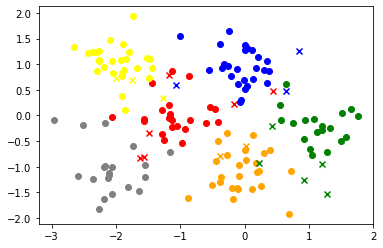

In [102]:
# The test data
predicted = model.predict(xTest)
yPred_Test = np.zeros((xTest.shape[0],1))
for i in range(predicted.shape[0]):
    yPred_Test[i] = np.argmax(predicted[i,:])
yPred_Test = yPred_Test.squeeze()

fig, ax = plt.subplots(1,1)

colors = ["red", "green", "blue", "orange", "yellow", "gray"]

for i in range(len(yTest)):
    if yTest[i] != yPred_Test[i]:
        marker = "x"
    else:
        marker = "o"
    plt.scatter(xTest[i,0],xTest[i,1], c = colors[int(yPred_Test[i])], marker = marker)

print(f" Training error: {evalCatErr(yTest, yPred_Test)}")



20/20 [==============================] - 0s 1ms/step
 CV error: 0.0375


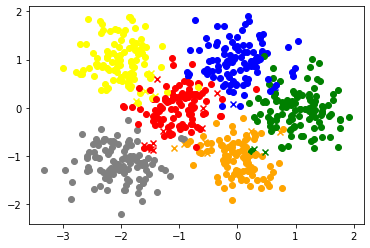

In [103]:
# The cross validation data
predicted = model.predict(xCV)
yCV_Test = np.zeros((xCV.shape[0],1))
for i in range(predicted.shape[0]):
    yCV_Test[i] = np.argmax(predicted[i,:])
yCV_Test = yCV_Test.squeeze()

fig, ax = plt.subplots(1,1)

colors = ["red", "green", "blue", "orange", "yellow", "gray"]

for i in range(len(yCV)):
    if yCV[i] != yCV_Test[i]:
        marker = "x"
    else:
        marker = "o"
    plt.scatter(xCV[i,0],xCV[i,1], c = colors[int(yCV_Test[i])], marker = marker)

print(f" CV error: {evalCatErr(yCV, yCV_Test)}")

In [104]:
# Second model(Simpler)

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units = 6, activation = "relu"),
        tf.keras.layers.Dense(units = 6, activation = "linear")
    ], name  = "simple"
)

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(.01)
)

model.fit(xTrain, yTrain, epochs = 1000)
model.summary()

Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.8940
Epoch 2/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.5465
Epoch 3/1000
13/13 [==============================] - 0s 835us/step - loss: 1.3372
Epoch 4/1000
13/13 [==============================] - 0s 836us/step - loss: 1.1844
Epoch 5/1000
13/13 [==============================] - 0s 910us/step - loss: 1.0543
Epoch 6/1000
13/13 [==============================] - 0s 863us/step - loss: 0.9145
Epoch 7/1000
13/13 [==============================] - 0s 901us/step - loss: 0.7844
Epoch 8/1000
13/13 [==============================] - 0s 806us/step - loss: 0.6586
Epoch 9/1000
13/13 [==============================] - 0s 802us/step - loss: 0.5622
Epoch 10/1000
13/13 [==============================] - 0s 901us/step - loss: 0.4924
Epoch 11/1000
13/13 [==============================] - 0s 820us/step - loss: 0.4416
Epoch 12/1000
13/13 [==============================] - 0s 876us/step - loss: 0.4078
Epoch

5/5 [==============================] - 0s 1ms/step
 Training error: 0.1375


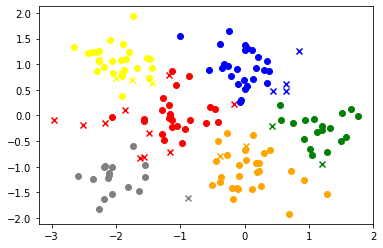

In [105]:
# The test data on a simpler model
predicted = model.predict(xTest)
yPred_Test = np.zeros((xTest.shape[0],1))
for i in range(predicted.shape[0]):
    yPred_Test[i] = np.argmax(predicted[i,:])
yPred_Test = yPred_Test.squeeze()

fig, ax = plt.subplots(1,1)

colors = ["red", "green", "blue", "orange", "yellow", "gray"]

for i in range(len(yTest)):
    if yTest[i] != yPred_Test[i]:
        marker = "x"
    else:
        marker = "o"
    plt.scatter(xTest[i,0],xTest[i,1], c = colors[int(yPred_Test[i])], marker = marker)

print(f" Training error: {evalCatErr(yTest, yPred_Test)}")

20/20 [==============================] - 0s 930us/step
 CV error: 0.06875


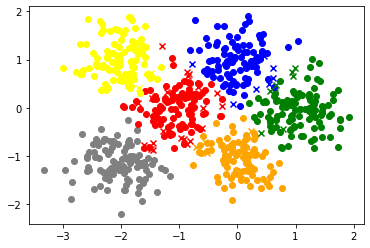

In [106]:
# The cross validation data on a simpler model
predicted = model.predict(xCV)
yCV_Test = np.zeros((xCV.shape[0],1))
for i in range(predicted.shape[0]):
    yCV_Test[i] = np.argmax(predicted[i,:])
yCV_Test = yCV_Test.squeeze()

fig, ax = plt.subplots(1,1)

colors = ["red", "green", "blue", "orange", "yellow", "gray"]

for i in range(len(yCV)):
    if yCV[i] != yCV_Test[i]:
        marker = "x"
    else:
        marker = "o"
    plt.scatter(xCV[i,0],xCV[i,1], c = colors[int(yCV_Test[i])], marker = marker)

print(f" CV error: {evalCatErr(yCV, yCV_Test)}")

In [107]:
# Constructing a model consisting of regulizers
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units = 120, activation = "relu", kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(units = 40, activation = "relu", kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(units = 6, activation = "linear")
    ], name  = "simple"
)

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(.01)
)

model.fit(xTrain, yTrain, epochs = 1000)
model.summary()

Epoch 1/1000
13/13 [==============================] - 1s 1ms/step - loss: 4.4480
Epoch 2/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.6248
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.2450
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.0310
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9721
Epoch 6/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9377
Epoch 7/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9053
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8548
Epoch 9/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.7903
Epoch 10/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.7668
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7482
Epoch 12/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.7393
Epoch 13/1000
13/13 [====